In [6]:
import pandas as pd 
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
import xgboost as xg
xgr=xg.XGBRegressor()

from sklearn.linear_model import LassoCV,Lasso,RANSACRegressor,Ridge,RidgeCV
rans=RANSACRegressor()


In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [10]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# EDA

<AxesSubplot:xlabel='rank', ylabel='count'>

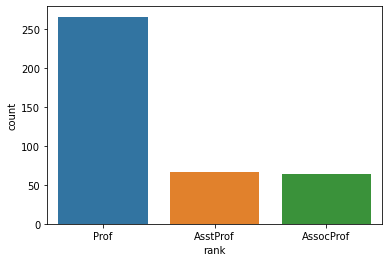

In [11]:
sb.countplot(x=df['rank'])

<AxesSubplot:xlabel='discipline', ylabel='count'>

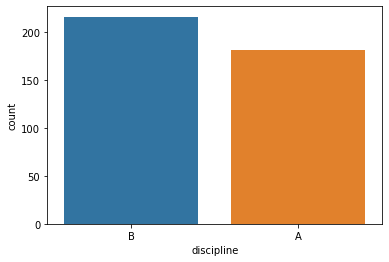

In [12]:
sb.countplot(x=df['discipline'])

<AxesSubplot:xlabel='sex', ylabel='count'>

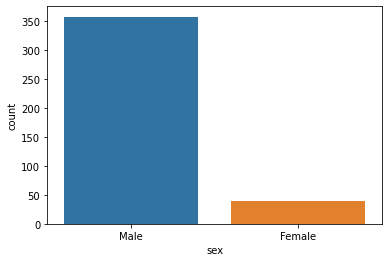

In [13]:
sb.countplot(x=df['sex'])

B:\i new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

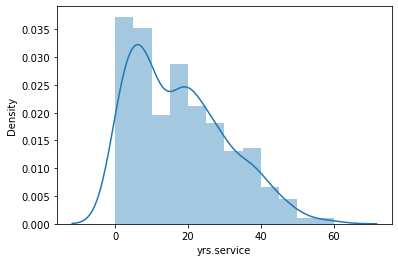

In [14]:
sb.distplot(df['yrs.service'])

B:\i new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

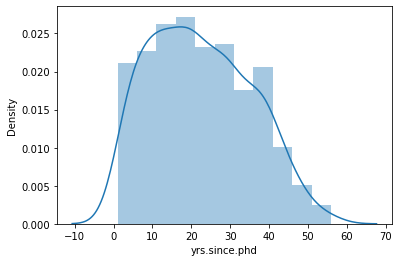

In [15]:
sb.distplot(df['yrs.since.phd'])

## categorical columns:-
### rank,discipline,sex

## continous columns:-
### yrs.service,yrs.since.phd

# Handling the categorical data, string into numeric

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [19]:
df['rank']=le.fit_transform(df['rank'])
df['rank'].unique()  

array([2, 1, 0])

B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rank', ylabel='count'>

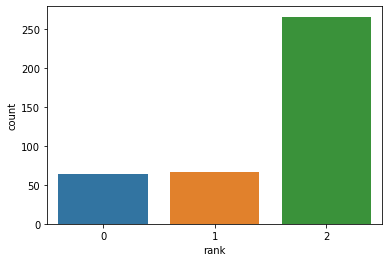

In [20]:
sb.countplot(df['rank']) ## AssocProf=0 ,AsstProf=1, Prof=2

In [21]:
df['discipline']=le.fit_transform(df['discipline'])
df['discipline'].unique()

array([1, 0])

B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='discipline', ylabel='count'>

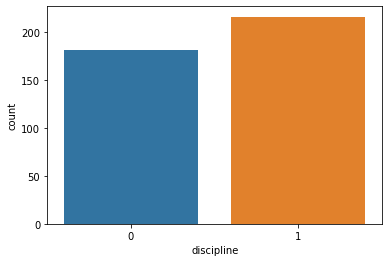

In [22]:
sb.countplot(df['discipline'])  # A=0, B=1

In [23]:
df['sex']=le.fit_transform(df['sex'])
df['sex'].unique()

array([1, 0])

B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

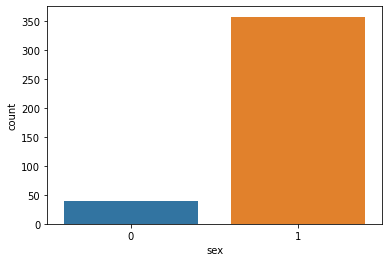

In [24]:
sb.countplot(df['sex']) # female=0, male=1

# checking outliers

<AxesSubplot:ylabel='yrs.service'>

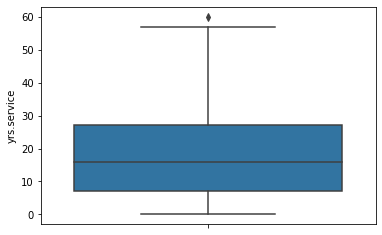

In [25]:
sb.boxplot(y=df['yrs.service'],data=df)  ## there is only one outliers 

<AxesSubplot:ylabel='yrs.since.phd'>

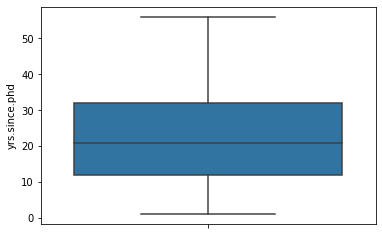

In [26]:
sb.boxplot(y=df['yrs.since.phd'],data=df)# there is no outlirs 

# Handling outliers 

In [27]:
ser=pd.Series(df['yrs.service'])
q1=ser.quantile(0.25)
q3=ser.quantile(0.75)
iqr=q3-q1
upside=q3+(1.5*iqr)

In [28]:
df=df[df['yrs.service']<upside]
df.reset_index()

,index,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,2,1,19,18,1,139750
1,1,2,1,20,16,1,173200
2,2,1,1,4,3,1,79750
3,3,2,1,45,39,1,115000
4,4,2,1,40,41,1,141500
...,...,...,...,...,...,...,...
390,392,2,0,33,30,1,103106
391,393,2,0,31,19,1,150564
392,394,2,0,42,25,1,101738
393,395,2,0,25,15,1,95329


<AxesSubplot:ylabel='yrs.service'>

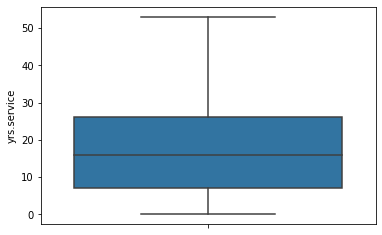

In [29]:
sb.boxplot(y=df['yrs.service'],data=df) # no outliers 

# Correlation

In [30]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086288,0.525817,0.449042,0.131584,0.525980
discipline,-0.086288,1.000000,-0.219332,-0.168479,0.003883,0.148671
yrs.since.phd,0.525817,-0.219332,1.000000,0.908110,0.146998,0.424047
yrs.service,0.449042,-0.168479,0.908110,1.000000,0.152397,0.334565
sex,0.131584,0.003883,0.146998,0.152397,1.000000,0.138945
salary,0.525980,0.148671,0.424047,0.334565,0.138945,1.000000


<AxesSubplot:>

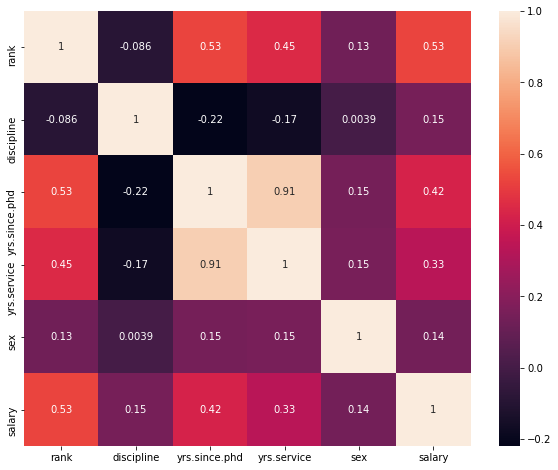

In [31]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)

# Importing libraries

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.metrics import r2_score

# spliting feature and target columns

In [34]:
x=df.drop(columns=['salary'],axis=1)
y=df['salary']

# Model building

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.25)


In [36]:
# linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [37]:
lr_predict=lr.predict(x_test)
r2_score(y_test,lr_predict)

0.35633919558670923

In [38]:
#KNEAREAST NEIGHBOUR
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)


KNeighborsRegressor()

In [39]:
knn_predict=knn.predict(x_test)
r2_score(y_test,knn_predict)

0.3283731188261261

In [40]:
#RANSACRegressor
rans=RANSACRegressor()
rans.fit(x_train,y_train)

RANSACRegressor()

In [41]:
rans_predict=rans.predict(x_test)
r2_score(y_test,rans_predict)

0.13977956971470618

In [42]:
# ADAboost regressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)


AdaBoostRegressor()

In [43]:
ada_predict=ada.predict(x_test)
r2_score(y_test,ada_predict)

0.4387615484950622

In [44]:
# Bagging regressor
br=BaggingRegressor()
br.fit(x_train,y_train)

BaggingRegressor()

In [45]:
br_predict=br.predict(x_test)

In [46]:
r2_score(y_test,br_predict)

0.338794493207515

In [47]:
# Gradient boosting
gd=GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [48]:
gd_predict=gd.predict(x_test)
r2_score(y_test,gd_predict)

0.36273698200423343

In [49]:
# xtream gradient boosting 
xgr.fit(x_train,y_train)
xgr_predict=xgr.predict(x_test)
r2_score(y_test,xgr_predict)

0.2298771590954578

In [50]:
# Random forest regressor
rd=RandomForestRegressor()
rd.fit(x_train,y_train)
rd_predict=rd.predict(x_test)

In [51]:
r2_score(y_test,rd_predict)

0.3946326945052645

In [52]:
# SVM
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [53]:
svr_predict=svr.predict(x_test)
r2_score(y_test,svr_predict)

-0.03766173313288501

In [54]:
# Extra tree
et=ExtraTreeRegressor()

In [55]:
et.fit(x_train,y_train)

ExtraTreeRegressor()

In [56]:
et_predict=et.predict(x_test)
r2_score(y_test,et_predict)

0.13196581745672797

# using regularization

In [57]:
lassocv=LassoCV(max_iter=100,normalize=True,alphas=None)
lassocv.fit(x_train,y_train)

B:\i new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(max_iter=100, normalize=True)

In [58]:
parameter=lassocv.alpha_

In [59]:
lasso_reg=Lasso(parameter)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.919898072372154)

In [60]:
lasso_predict=lasso_reg.predict(x_test)
r2_score(y_test,lasso_predict)

0.3563389580518771

In [61]:
#Ridge

In [62]:
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridge.fit(x_train,y_train)


B:\i new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [63]:
ridge.alpha_

0.011

In [64]:
ridge_reg=Ridge(alpha=ridge.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.011)

In [65]:
ridge_reg_predict=ridge_reg.predict(x_test)

In [66]:
r2_score(y_test,ridge_reg_predict)

0.35633684335831584

# ADAboost is showing better results so,  i am selecting the model
 # Hypertuning the model for better prediction

In [105]:
ada_new=AdaBoostRegressor(base_estimator=RandomForestRegressor(),n_estimators=80)
ada_new.fit(x_train,y_train)

# using the RandomForestRegressor for base_estimator n ada_boost

AdaBoostRegressor(base_estimator=RandomForestRegressor(), n_estimators=80)

In [106]:
ada_predict= ada.predict(x_test)
r2_score(y_test,ada_predict)

0.4061069512534017

In [108]:
import pickle

In [115]:

pickle.dump(ada_new,open('salary_prediction','wb'))